**what is kmeans clustering?**

K-Means clustering is an '__unsupervised__' machine learning algorithm used to partition a dataset into "__K distinct__", non-overlapping groups (clusters) based on feature similarity. The algorithm assigns each data point to the cluster with the nearest mean (centroid), iteratively updating the centroids until the assignments no longer change or a maximum number of iterations is reached. K-Means is widely used for exploratory data analysis, customer segmentation, image compression, and more.


**How to find the optimum number of clusters in K-Means?**

Determining the best value for K (the number of clusters) is a crucial step in K-Means clustering. Common methods include:

- **Elbow Method:** Plot the sum of squared distances (inertia) for different values of K. The "elbow" point, where the rate of decrease sharply changes, suggests a good K.
- **Silhouette Score:** Measures how similar a data point is to its own cluster compared to other clusters. Higher average silhouette scores indicate better-defined clusters.
- **Gap Statistic:** Compares the total within-cluster variation for different K values with their expected values under a null reference distribution.

These methods help in selecting a K that balances model simplicity and clustering quality.


**Elbow method**

The elbow method is a popular technique to find the optimal number of clusters (K) in K-Means clustering.
 
Step-by-step process:
1. Run K-Means clustering on your dataset for a range of K values (for example, from 1 to 10).
2. For each K, calculate the Within-Cluster Sum of Squares (WSS), **also known as inertia**. This measures how tightly the data points in a cluster are grouped around the centroid.
3. Plot the WSS (y-axis) against the number of clusters K (x-axis).
4. Look for a point on the plot where the decrease in WSS begins to slow down and forms a bend or "elbow." This point suggests that adding more clusters does not significantly improve the clustering.
5. The value of K at the "elbow" is considered the optimal number of clusters for your data.


Calculate WSS(Within cluster Sum of Squares):


![alt text](<Untitled picture.png>)

![alt text](<Untitled picture-1.png>)

![alt text](<Untitled picture-2.png>)

KMeans Clustering

**K-Means Clustering: Step-by-Step Process**

1. **Choose the number of clusters (K):**
    - Decide how many clusters you want to find in your data.

    ![alt text](<Untitled picture-3.png>)
 
2. **Initialize centroids:**
    - Randomly select K data points as the initial cluster centroids.
 
3. **Assign each data point to the nearest centroid:**
    - For each data point, calculate the distance to each centroid.
    - Assign the point to the cluster with the closest centroid.

    ![alt text](<Untitled picture-4.png>)
 
 4. **Update centroids:**
    - For each cluster, compute the new centroid by taking the mean of all data points assigned to that cluster.

    ![alt text](<Untitled picture-5.png>)
 
5. **Repeat steps 3 and 4:**
    - Continue reassigning points and updating centroids until the assignments no longer change or a maximum number of iterations is reached.
![alt text](<Untitled picture-6.png>)

 ![alt text](<Untitled picture-7.png>)
6. **Result:**
    - The algorithm outputs K clusters, each with its own centroid and assigned data points.
 
 **Summary:**  
 K-Means clustering iteratively groups data points into K clusters by minimizing the distance between points and their assigned cluster centroids.


# Random Initialization Trap

What is the Random Initialization Trap in K-Means Clustering?
 
In K-Means clustering, the algorithm starts by randomly selecting K initial centroids. This random initialization can sometimes lead to poor clustering results because:
- The algorithm may converge to a **local minimum** rather than the global optimum.
- Different initializations can produce different final clusters.
- Poor initial centroids can result in empty clusters or slow convergence.
 
This problem is known as the **Random Initialization Trap**.
 


![alt text](<Untitled picture-8.png>)


How to Avoid the Random Initialization Trap
 
1. **Run K-Means Multiple Times:**  
   Run the algorithm several times with different random initializations and choose the clustering with the lowest total within-cluster sum of squares (inertia).

2. **Use Smarter Initialization Methods:**  
   - **K-Means++ Initialization:**  
      Instead of choosing centroids completely at random, K-Means++ spreads out the initial centroids, which often leads to better and more consistent results.
 
3. **Set a Random Seed:**  
    For reproducibility, set a random seed so that the results can be replicated.
 
**Summary:**  
The random initialization trap can negatively affect K-Means clustering results. Using methods like K-Means++ or running the algorithm multiple times helps avoid this issue and leads to more reliable clustering.


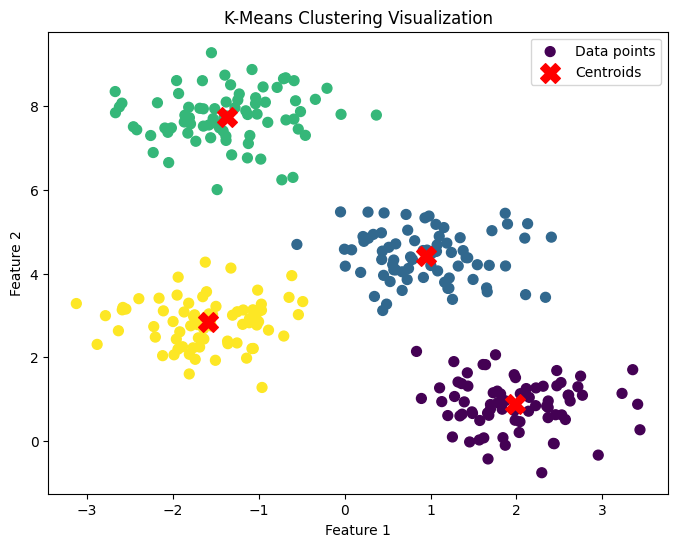

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data for clustering
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters and centroids
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


 
**How to Measure Cluster Performance**
 
There are several ways to evaluate the quality of clustering results:
 
1. **Inertia (Within-Cluster Sum of Squares):**
    - Measures how internally coherent the clusters are.
    - Lower inertia means tighter clusters.
    - In scikit-learn, you can access this using `kmeans.inertia_`.
 
2. **Silhouette Score:**
    - Measures how similar a point is to its own cluster compared to other clusters.
    - Ranges from -1 (incorrect clustering) to +1 (highly dense clustering).
    - Can be computed using `sklearn.metrics.silhouette_score`.
 
3. **Davies-Bouldin Index:**
    - Evaluates the average similarity between each cluster and its most similar one.
    - Lower values indicate better clustering.
    - Can be computed using `sklearn.metrics.davies_bouldin_score`.
 
4. **Calinski-Harabasz Index:**
    - Ratio of between-cluster dispersion to within-cluster dispersion.
    - Higher values indicate better-defined clusters.
    - Can be computed using `sklearn.metrics.calinski_harabasz_score`.
 
**Example:**


In [2]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

inertia = kmeans.inertia_
silhouette = silhouette_score(X, y_kmeans)
davies_bouldin = davies_bouldin_score(X, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)

print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")


Inertia: 212.01
Silhouette Score: 0.68
Davies-Bouldin Index: 0.44
Calinski-Harabasz Index: 1210.09


These metrics help you compare different clustering results and choose the best model for your data.


**Silhoutte Sxore**

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).


![alt text](<Untitled picture-9.png>)


It ranges from -1 to + 1, where higher value means a point is well matched with its own cluster and poorly matched with neighboring cluster.

